# Exemple Simple Classification Hiérarchique

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

## Importing the dataset

In [2]:
fromages = pd.read_csv('http://www.math.u-bordeaux.fr/~mchave100p/wordpress/wp-content/uploads/2013/10/fromage.txt', sep='\t') 

In [3]:
fromages

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
5,Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
6,Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
7,Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
8,Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28
9,Comte,399,92.0,220.5,32.4,55.9,1.3,29.2,120,51


In [4]:
fromages.set_index('Fromages', inplace=True)
fromages

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


## Matrice des données

In [5]:
X = fromages.iloc[:,:].values
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,314.0,353.5,72.6,26.3,51.6,30.3,21.0,70.0,20.0
1,314.0,238.0,209.8,25.1,63.7,6.4,22.6,70.0,27.0
2,401.0,112.0,259.4,33.3,54.9,1.2,26.6,120.0,41.0
3,342.0,336.0,211.1,28.9,37.1,27.5,20.2,90.0,27.0
4,264.0,314.0,215.9,19.5,103.0,36.4,23.4,60.0,20.0
5,367.0,256.0,264.0,28.8,48.8,5.7,23.0,90.0,30.0
6,344.0,192.0,87.2,27.9,90.1,36.3,19.5,80.0,36.0
7,292.0,276.0,132.9,25.4,116.4,32.5,17.8,70.0,25.0
8,406.0,172.0,182.3,32.5,76.4,4.9,26.0,110.0,28.0
9,399.0,92.0,220.5,32.4,55.9,1.3,29.2,120.0,51.0


In [6]:
# Nombres des individus
n = len(X)

# Nombres des variables
p = len(X[0])

## Les moyennes des variable

In [7]:
mean = X.mean(axis=0)
pd.DataFrame({'Moyenne':mean}).T

,0,1,2,3,4,5,6,7,8
Moyenne,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517


## L'ecart type pour chaque variable

In [8]:
std = X.std(axis=0)
pd.DataFrame({'Ecart type':std}).T

,0,1,2,3,4,5,6,7,8
Ecart type,90.315723,106.788711,71.267414,7.988246,23.742838,11.519439,6.838739,27.754487,11.121532


## Matrice des données centré reduits

In [9]:
Z = (X-mean)/std
pd.DataFrame(Z)

,0,1,2,3,4,5,6,7,8
0,0.154630,1.342968,-1.587464,0.268066,-0.672290,1.500911,0.121519,-0.165242,-0.626309
1,0.154630,0.261393,0.337679,0.117846,-0.162662,-0.573843,0.355480,-0.165242,0.003101
2,1.117917,-0.918507,1.033649,1.144354,-0.533301,-1.025253,0.940383,1.636269,1.261920
3,0.464654,1.179093,0.355920,0.593544,-1.283000,1.257844,0.004538,0.555362,0.003101
4,-0.398983,0.973078,0.423272,-0.583184,1.492574,2.030451,0.472461,-0.525544,-0.626309
5,0.741460,0.429950,1.098195,0.581026,-0.790220,-0.634609,0.413970,0.555362,0.272848
6,0.486798,-0.169364,-1.382602,0.468361,0.949252,2.021770,-0.097820,0.195060,0.812342
7,-0.088960,0.617236,-0.741355,0.155401,2.056954,1.691893,-0.346404,-0.165242,-0.176731
8,1.173279,-0.356650,-0.048191,1.044207,0.372236,-0.704057,0.852648,1.275966,0.093016
9,1.095773,-1.105793,0.487818,1.031688,-0.491183,-1.016572,1.320570,1.636269,2.161077


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z2 = sc.fit_transform(X)
pd.DataFrame(Z2)

,0,1,2,3,4,5,6,7,8
0,0.154630,1.342968,-1.587464,0.268066,-0.672290,1.500911,0.121519,-0.165242,-0.626309
1,0.154630,0.261393,0.337679,0.117846,-0.162662,-0.573843,0.355480,-0.165242,0.003101
2,1.117917,-0.918507,1.033649,1.144354,-0.533301,-1.025253,0.940383,1.636269,1.261920
3,0.464654,1.179093,0.355920,0.593544,-1.283000,1.257844,0.004538,0.555362,0.003101
4,-0.398983,0.973078,0.423272,-0.583184,1.492574,2.030451,0.472461,-0.525544,-0.626309
5,0.741460,0.429950,1.098195,0.581026,-0.790220,-0.634609,0.413970,0.555362,0.272848
6,0.486798,-0.169364,-1.382602,0.468361,0.949252,2.021770,-0.097820,0.195060,0.812342
7,-0.088960,0.617236,-0.741355,0.155401,2.056954,1.691893,-0.346404,-0.165242,-0.176731
8,1.173279,-0.356650,-0.048191,1.044207,0.372236,-0.704057,0.852648,1.275966,0.093016
9,1.095773,-1.105793,0.487818,1.031688,-0.491183,-1.016572,1.320570,1.636269,2.161077


## Application de ACP

In [11]:
from sklearn.decomposition import PCA
acp = PCA()

### Matrice F des composants principales

In [12]:
F = acp.fit_transform(Z)
pd.DataFrame(F, columns=["F"+str(i) for i in range(p)])

,F0,F1,F2,F3,F4,F5,F6,F7,F8
0,0.641901,-1.802787,-1.507441,-0.594272,0.975072,-0.206674,-0.523195,-0.027300,-0.053324
1,-0.472445,0.333176,-0.247080,0.399021,-0.198051,-0.278605,-0.182601,0.157865,-0.000068
2,-2.928683,1.049375,0.556448,-0.847560,-0.163630,0.118782,0.450192,-0.095808,-0.044256
3,-0.763345,-0.692700,-1.343259,0.006838,1.525419,0.350439,0.551642,0.018623,-0.023814
4,0.974337,-1.926358,0.803939,1.393951,1.040326,-0.587554,0.389771,-0.191054,-0.044653
5,-1.646736,0.621676,-0.623103,0.370701,0.152968,-0.029813,0.408841,0.158031,0.139127
6,0.211595,-2.087461,0.974471,-1.189462,0.834488,0.649837,-0.397455,0.157446,0.157025
7,0.914016,-2.488003,0.994554,0.300089,0.022871,0.316492,0.125259,0.101588,-0.057191
8,-1.903504,-0.327904,0.243286,-0.838108,-0.846061,-0.495638,0.356690,-0.031894,0.110886
9,-3.180101,1.024943,0.990729,-1.242228,0.005314,0.330370,-0.423655,-0.329456,-0.081464


### Les valeurs propres

#### Pourcentage des valeurs propres

$$ \frac{\lambda_{\alpha}}{\lambda_{1}+....+ \lambda_{p}} $$

In [13]:
valeur_propres = np.std(F,axis=0)**2

# Calcule du pourcentage des valeur propre
somme = sum(valeur_propres)
pourcentage = [valeur_propres[i]*100/somme for i in range(p)]

# Pourcentage cumulé
pourcentage_cumule = np.cumsum(pourcentage)

pd.DataFrame({'Valeurs Propres':valeur_propres,
              'Pourcentage': pourcentage,
              'Pourcentage Cumulé':pourcentage_cumule
             }).T

,0,1,2,3,4,5,6,7,8
Valeurs Propres,5.049114,1.844418,0.867801,0.577385,0.355210,0.175312,0.097434,0.028431,0.004895
Pourcentage,56.101265,20.493537,9.642232,6.415385,3.946779,1.947907,1.082602,0.315901,0.054391
Pourcentage Cumulé,56.101265,76.594802,86.237034,92.652420,96.599199,98.547106,99.629708,99.945609,100.000000


### Visualisation de pourcentage des valeurs propres

<IPython.core.display.Javascript object>


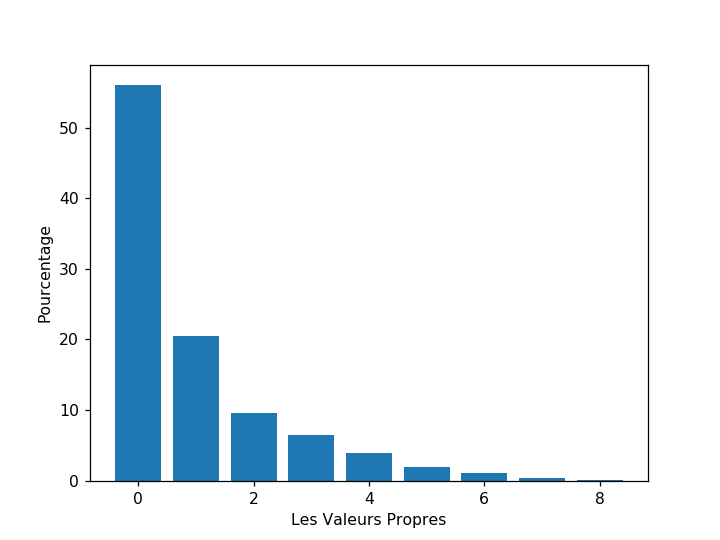

Text(0, 0.5, 'Pourcentage')

In [14]:
fig1 = plt.figure("Pourcentage des Valeurs Propre")
ax1 = fig1.add_subplot()

ax1.bar(x=range(p) ,height=pourcentage)

ax1.set_xlabel("Les Valeurs Propres")
ax1.set_ylabel("Pourcentage")

<IPython.core.display.Javascript object>


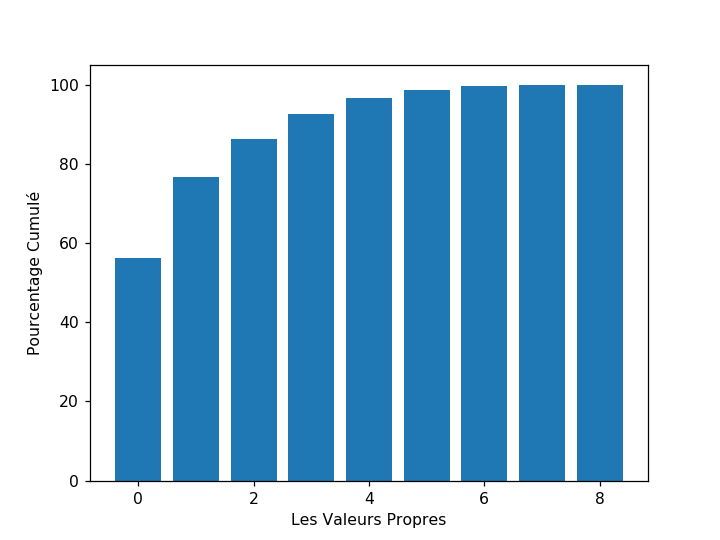

Text(0, 0.5, 'Pourcentage Cumulé')

In [15]:
fig2 = plt.figure("Pourcentage Cumulé des Valeurs Propre")
ax2 = fig2.add_subplot()

ax2.bar(x=range(p) ,height=pourcentage_cumule)

ax2.set_xlabel("Les Valeurs Propres")
ax2.set_ylabel("Pourcentage Cumulé")

In [16]:
pourcentage_cumule[2] 

86.23703441354863

## Visualisation de données avec ACP

## En 3D

<IPython.core.display.Javascript object>


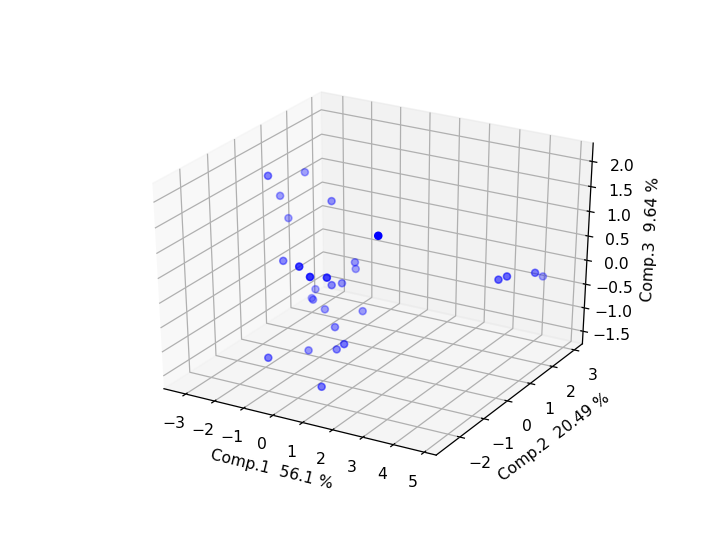

Text(0.5, 0, 'Comp.3  9.64 %')

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig3 = plt.figure("Visualisation des données en 3D")
ax3 = fig3.add_subplot(111, projection='3d')

ax3.scatter(F[:,0], F[:,1], F[:,2], c = 'b', marker='o')


ax3.set_xlabel("Comp.1  "+ str(round(pourcentage[0],2))+" %")
ax3.set_ylabel("Comp.2  "+ str(round(pourcentage[1],2))+" %")
ax3.set_zlabel("Comp.3  "+ str(round(pourcentage[2],2))+" %")

# for i in range(n):
#     ax3.text(F[i,0],F[i,1],F[i,2],i)

## Classification

### Nombre de groups
* determinons d abord nombre de groups avec la methode de dendrogram on utilisons la distance <i>Ward</i>

$$ d(u,v) = \sqrt{\frac{|v|+|s|}
                           {T}d(v,s)^2
                    + \frac{|v|+|t|}
                           {T}d(v,t)^2
                    - \frac{|v|}
                           {T}d(s,t)^2}$$

$$ d(A,B) = \frac{n_1*n_2}{n_1+n_2}\sum_{w \in A \cup B} d^2(w,G_{AB})$$

<IPython.core.display.Javascript object>


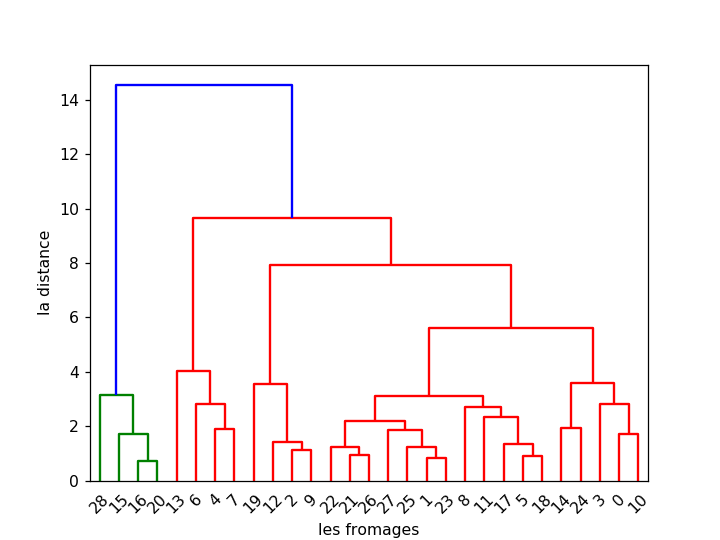

Text(0, 0.5, 'la distance')

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

fig4 = plt.figure("Dendrogram")
ax4 = fig4.add_subplot()

dendogram = dendrogram(linkage(Z,method = 'ward'))

ax4.set_xlabel('les fromages')
ax4.set_ylabel('la distance')

In [19]:
n_clusters=2

## Training l'algorithme de Classification Hiérarchique  sur les données

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters,affinity='euclidean',linkage='ward')

### Prediction des groupe

In [21]:
y_hc = hc.fit_predict(F)
pd.DataFrame(y_hc)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### Visualisation du groups en 3D

<IPython.core.display.Javascript object>


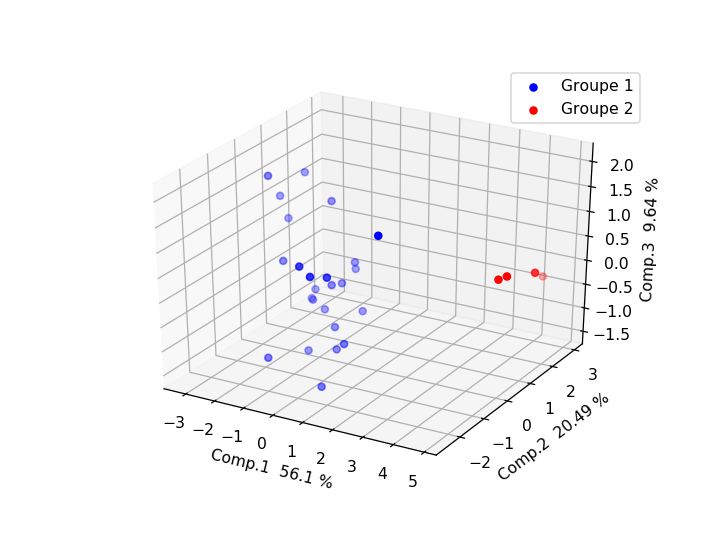

In [29]:
fig4 = plt.figure("Visualisation des groupes en 3D")
ax4 = fig4.add_subplot(111, projection='3d')

ax4.scatter(F[y_hc==0,0], F[y_hc==0,1], F[y_hc==0,2], c = 'b', marker='o', label = 'Groupe 1')
ax4.scatter(F[y_hc==1,0], F[y_hc==1,1], F[y_hc==1,2], c = 'r', marker='o', label = 'Groupe 2')


ax4.set_xlabel("Comp.1  "+ str(round(pourcentage[0],2))+" %")
ax4.set_ylabel("Comp.2  "+ str(round(pourcentage[1],2))+" %")
ax4.set_zlabel("Comp.3  "+ str(round(pourcentage[2],2))+" %")
ax4.legend()

# for i in range(n):
#     ax3.text(F[i,0],F[i,1],F[i,2],i)

### Visualisation des groupes en 2D

<IPython.core.display.Javascript object>


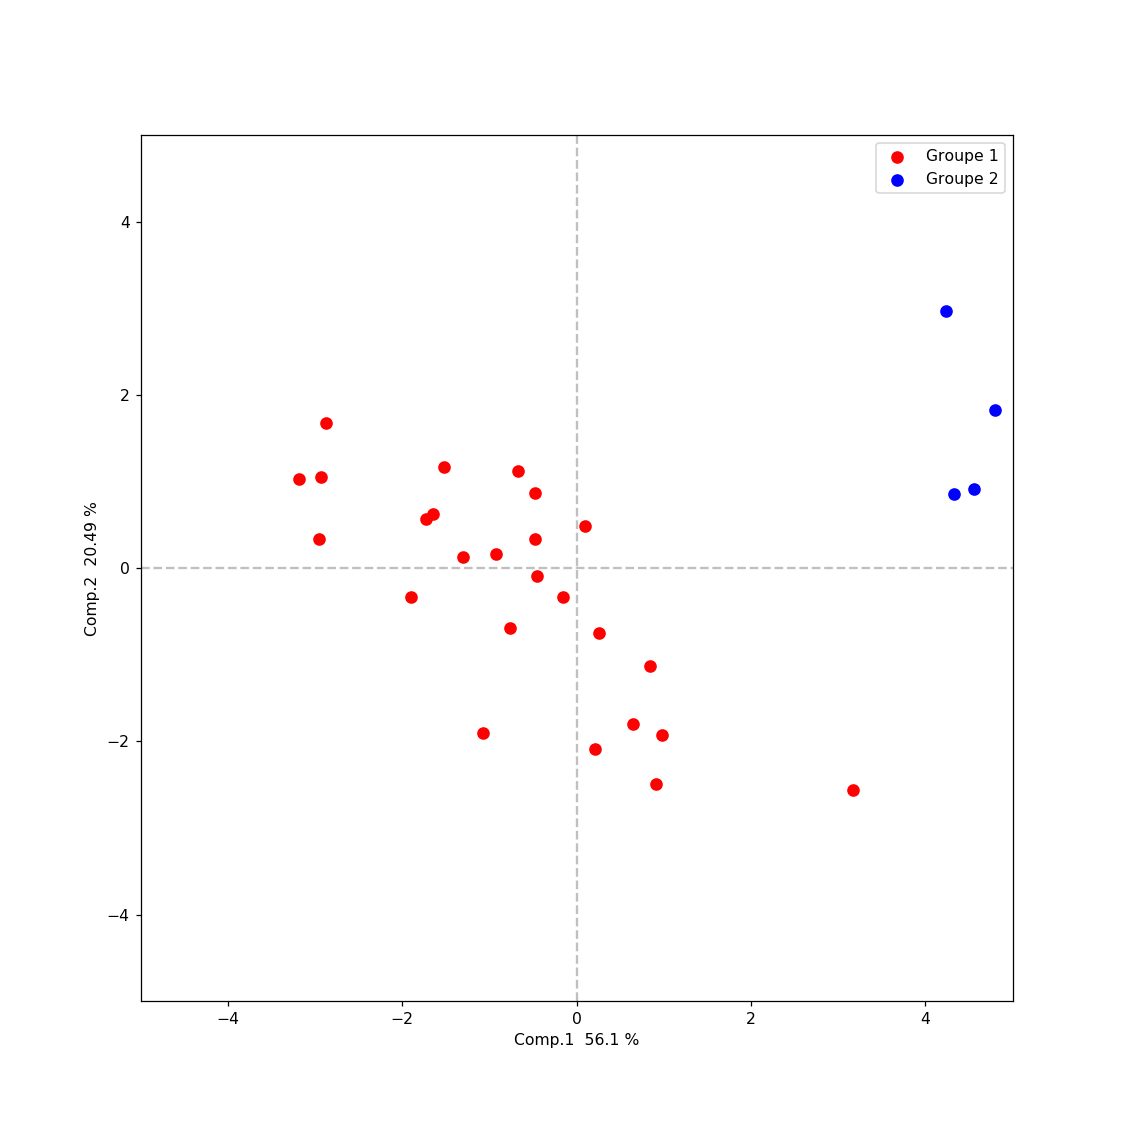

In [36]:
dim = 10
fig5 = plt.figure(figsize=(dim,dim), num="Visualisation des groupes en 2D")
ax5 = fig5.add_subplot()

ax5.scatter(F[y_hc == 0, 0], F[y_hc == 0, 1], s = 50, c = 'red', label = 'Groupe 1')
ax5.scatter(F[y_hc == 1, 0], F[y_hc == 1, 1], s = 50, c = 'blue', label = 'Groupe 2')

ax5.axis([-dim/2,+dim/2,-dim/2,+dim/2])
ax5.plot([-dim/2,+dim/2],[0,0],color='silver',linestyle='--')
ax5.plot([0,0],[-dim/2,+dim/2],color='silver',linestyle='--')
ax5.set_xlabel("Comp.1  "+ str(round(pourcentage[0],2))+" %")
ax5.set_ylabel("Comp.2  "+ str(round(pourcentage[1],2))+" %")
ax5.legend()